## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [73]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [74]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [75]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [76]:
n = len(pd.unique(df['user_id']))
print (n)

290584


d. The proportion of users converted.

In [77]:
new_df = df.loc[df['converted'] == 1]
s = "The number of users converted : "
x = new_df.shape[0]
s += str(x)
print(s)

s2 =  "The proportion of users converted: "
prop = (x / n) * 100
s2 += str(prop)
s2 += "%"
print(s2)

The number of users converted : 35237
The proportion of users converted: 12.126269856564711%


e. The number of times the `new_page` and `treatment` don't match.

In [78]:
# # df["group"] = df["group"].str()
# df.dtypes
# df.loc[~((df['group'] == "treatment") &  (df['landing_page'] == "new_page"))]
df_2 = df[['group', 'landing_page']].assign(NE= ((df['group'] == "treatment") & (df["landing_page"] == "old_page")))
df_3 = df[['group', 'landing_page']].assign(NE= ((df['group'] == "control") & (df["landing_page"] == "new_page")))
df_2.head()

s = "The number of times the new_page and treatment don't match : "
num = len(df_2[df_2['NE'] == True])
num2 = len(df_3[df_3['NE'] == True])
num = num + num2
s += str(num)
print(s)

The number of times the new_page and treatment don't match : 3893


f. Do any of the rows have missing values?

In [79]:
df.isnull().values.any()

False

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [80]:
df2 = df[["user_id", "timestamp","group","landing_page","converted"]].assign(NE= ((df['group'] == "treatment") & (df["landing_page"] == "old_page") | (df['group'] == "control") & (df["landing_page"] == "new_page") ))

index_names = df2[df2['NE'] == True].index

df2.drop(index_names, inplace = True)

df2.head()

,user_id,timestamp,group,landing_page,converted,NE
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,False
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,False
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,False
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,False
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,False


In [81]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [82]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [83]:
df2.loc[df2.user_id.duplicated(), :]

,user_id,timestamp,group,landing_page,converted,NE
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,False


c. What is the row information for the repeat **user_id**? 

In [84]:
df2.loc[df2['user_id'] == 773192, :]

,user_id,timestamp,group,landing_page,converted,NE
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,False
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,False


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [85]:
df2 = df2.drop_duplicates(subset='user_id', keep='first')

df2.loc[df2['user_id'] == 773192, :]

,user_id,timestamp,group,landing_page,converted,NE
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,False


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [86]:
df2.head()
len(df2[df2['converted'] == 1]) / df2.shape[0]

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [87]:
p_cont_conv = len(df2[(df2['group'] == 'control') & (df2['converted'] == 1)]) / len(df2[df2['group'] == 'control'])
p_cont_conv

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [88]:
p_treat_conv = len(df2[(df2['group'] == 'treatment') & (df2['converted'] == 1)]) / len(df2[df2['group'] == 'treatment'])
p_treat_conv

0.11880806551510564

d. What is the probability that an individual received the new page?

In [89]:
len(df2[df2['landing_page'] == 'new_page']) / df2.shape[0]

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

As calculated in part b & c, given that the page is treatment there is 0.118 probability that the visitor will convert, and given that the page is control there is 0.12 probability that the visitor will convert.
However this cannot be called sufficient evidence because the values are very close to each other.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` I have assumed that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, $H_0$: $p_{new}$ - $p_{old}$ <=0, $H_1$:$p_{new}$ - $p_{old}$ >0 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [90]:
p_new = len(df2[df2['converted'] == 1]) / df2.shape[0]
print(p_new)

0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [91]:
p_old = len(df2[df2['converted'] == 1]) / df2.shape[0]
print(p_old)

0.11959708724499628


c. What is $n_{new}$, the number of individuals in the treatment group?

In [92]:
n_new = len(df2[df2['group'] == 'treatment'])

d. What is $n_{old}$, the number of individuals in the control group?

In [93]:
n_old = len(df2[df2['group'] == 'control'])

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [94]:
new_page_converted =  np.random.choice([0,1],size=len(df2[df2['group'] == 'treatment']), p=[1-p_new,p_new])
new_mean = new_page_converted.mean()

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [95]:
old_page_converted =  np.random.choice([0,1],size=len(df2[df2['group'] == 'control']), p=[1-p_old,p_old])
old_mean = old_page_converted.mean()

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [96]:
print(new_mean - old_mean)

-0.00181245684681


h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [97]:
p_diffs = np.random.binomial(n_new, p_new, 10000)/n_new - np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs[:5]

array([-0.00024297, -0.00135126, -0.00071786,  0.0007068 , -0.0004286 ])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

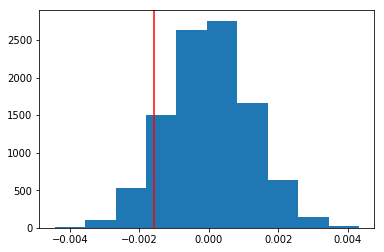

In [98]:
plt.hist(p_diffs)
plt.axvline(p_treat_conv-p_cont_conv,color='red')

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [99]:
actual_diff = p_treat_conv-p_cont_conv
pd_df = pd.DataFrame(p_diffs)
pd_df.columns = ['sim_diff']
len(pd_df.query('sim_diff > @actual_diff'))/len(pd_df)

0.909

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

This is the p-value if it's high then we cannot reject the null hypothesis, and if it's equal or smaller than 0.05 then we can reject the null hypothesis in favor of the alternative hypothesis.

In our case we cannot reject the null hypothesis, then we can conclude that the new page has not proved that it is better than the old page.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [100]:
import statsmodels.api as sm

n_old = len(df2[(df2['landing_page'] == 'old_page')])
n_new = len(df2[(df2['landing_page'] == 'new_page')])
convert_old = len(df2[(df2['landing_page'] == 'old_page') & (df2['converted'] == 1)]) 
convert_new = len(df2[(df2['landing_page'] == 'new_page') & (df2['converted'] == 1)]) 

print(convert_old)
print(convert_new)

17489
17264


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [101]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Z-score is measured in terms of standard deviations from the mean, in our case it's negative which means that it lies below the mean of our null hypothesis.

the p_value matches our findings in part j & k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [102]:
##drop the NE column which i created earlier
df2 = df2.drop('NE', axis = 1)
df2['intercept'] = 1
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [103]:
logit = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [104]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-25 17:40 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value is 0.1899 which is greater than 0.05 so we cannot reject the null hypothesis, the null and alternative hypotheses are the same of those in Part II.

The p-value differ from part II because the logistic regression model is a two tailed test which used to see if there is a relationship between variables in either direction rather than a single direction which is used in one tailed test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

There could be other factors that affect whether the visitor convert or not, so it would be beneficial for us if we could obtain other attributes.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [105]:
countries_df = pd.read_csv('countries.csv')
new_df = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
new_df['country'].nunique()
new_df[['CA', 'UK', 'US']] = pd.get_dummies(new_df['country'])
new_df.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,old_page,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [106]:
new_df['US_page'] = new_df['US'] * new_df['ab_page']
new_df['UK_page'] = new_df['UK'] * new_df['ab_page']
new_df.head()
log_mod = sm.Logit(new_df['converted'], new_df[['intercept', 'ab_page', 'US', 'UK', 'US_page', 'UK_page']])
result = log_mod.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-07-25 17:40 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US_page        0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK_page        0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

We can see that the countries p-value are all greater than 0.05, that means that there is no effect imposed on the conversion rate by the country attribute

## Conclusion
After these calculations that were performed in this project we can see that the null hypothesis cannot be rejected and there is no sufficient proof that the new page is better that the old page or in other words we cannot say that the visitors that see the new page tends to convert more than if they see the old page.

However there could be other variables that might give us the ability to reject the null hypothesis, and we have tried one of these which is the country variable but we have concluded that it has no effect on the conversion rate.